<h1><font color="#113D68" size=6>Deep Learning con Python y Keras VIDEO</font></h1>

<h1><font color="#113D68" size=5>Redes Neuronales Convolucionales</font></h1>

<h1><font color="#113D68" size=4>Reconocimiento de dígitos</font></h1>


---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. MNIST dataset](#section1)
* [2. Cargar MNIST](#section2)
* [3. Modelo de línea de base con MLP](#section3)
* [4. Prediccion de datos](#section4)


---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

En este proyecto, descubrirá cómo desarrollar un modelo de Deep Learning en la tarea de reconocimiento de dígitos manuscritos del MNIST. Después de completar este trabajo sabrá:
* Cómo cargar MNIST y desarrollar un modelo de red neuronal.
* Cómo implementar un modelo de Deep Learning avanzado para MNIST.

In [50]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. MNIST dataset</font>

MNIST toma imágenes de dígitos de una variedad de documentos escaneados, normalizados en tamaño y centrados.

Cada imagen es está dada en blanco y negro con $28 × 28$ píxeles (784 píxeles en total). Se usan 60,000 imágenes para entrenar un modelo y 10,000 imágenes para validarlo.

Es una tarea de reconocimiento de dígitos. Como tal, hay 10 dígitos (0 a 9) o 10 clases para predecir. 



<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre el dataset [MNIST](http://yann.lecun.com/exdb/mnist/)

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Cargar MNIST</font>

El conjunto de datos se descarga automáticamente la primera vez que se llama a esta función como un archivo de 15 megabytes. 

Primero escribiremos un pequeño script para descargar y visualizar las primeras 4 imágenes mediante la función `mnist.load data()`.

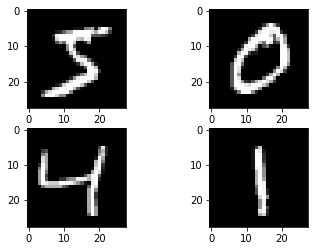

(60000, 28, 28)
3
uint8


In [51]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# cargar los datos MNIST dataset
(X_train,y_train) , (X_test, y_test)=mnist.load_data()

# 4 imagenes
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[8],cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
print(X_train.shape)
print(X_train.ndim)
print(X_train.dtype)

<a id="section3"></a>
# <font color="#004D7F" size=6>3. MLP de línea base</font>

Vamos a usar un MLP clásico como base para la comparación con modelos de redes neuronales convolucionales. 

Importamos las clases, funciones y el dataset MNIST.

In [52]:
# mas librerias
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# cargar data
(X_train,y_train) , (X_test, y_test)=mnist.load_data()


Para un MLP clásico debemos reducir las imágenes a un vector de píxeles. En este caso, las imágenes de tamaño $28 × 28$ serán vectores de entrada de 784 píxeles. 

Realizamos esta transformación meidante la función `reshape()`. 

Los valores de los píxeles son números enteros, por lo que los convertimos a punto flotante para poder normalizarlos.

In [53]:
# escalar los valores enteros a flotantes y hacer una normalizacion de los mismos

num_pixels= X_train.shape[1] * X_train.shape[2]# sacar el numero de pixels en total 784
 
#convertir el tensor de imagen a un vector de una sola dimension y convertir a flotante
X_train=X_train.reshape(X_train.shape[0],num_pixels).astype('float32') #X_train.shape[0]=60000
X_test=X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

X_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Normalizacion**
Los valores de los píxeles están en una escala de grises entre 0 y 255. Podemos normalizar los valores de los píxeles en el rango 0 y 1 dividiendo cada valor por el máximo valor, i.e., 255. Se realiza este proceso para que la red neurnal tenga la facilidad de converjer durante el entrenamiento. Para alimentar redes neuronales no se utiliza valores mayores a los pesos de un red, o datos que sean heteregoneos entre ellos

In [54]:
#pasar datos entre 0 y 1
X_train=X_train/255
X_test=X_test/255

Finalmente, la variable de salida es un número entero de 0 a 9. Por tanto, usaremos One-Hot Encoding para transformar el vector de enteros de clase en una matriz binaria. 

La finalidad de esto es transformar las variables categoricas a numericas

In [55]:
# se transformo la entrada a binaria tambien se procede a transformar los valores de salida en binarios
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]


Vamos a definir nuestro modelo:
1. El número de entradas será el tamaño máximo de pixeles (784)
2. Tendrá una capa oculta con el mismo número de neuronas que entradas (784). 
3. Se utiliza una función de activación ReLU en la capa oculta. 
4. Se utiliza una función de activación Softmax en la capa de salida. 
5. La función de pérdida será `categorical_crossentropy`. 
6. Utilizaremos ADAM para aprender los pesos. 


In [56]:
# funcion del modelo
def baseline_model():
    
    model=Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compilar el modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Entrenamos y evaluamos el modelo. 
1. El modelo se ajusta a más de 10 épocas con actualizaciones cada 200 imágenes. Actualizacion de sus pesos cada 200 imagenes
2. Los datos de test se utilizan como conjunto de datos de validación.
3. Se utiliza un valor `verbose` de 2. 
4. Evaluamos en test e imprimimos las métricas.

In [57]:
# contruir modelo
model = baseline_model()

# ajustar el modelo
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

# Evaluacion del modelo
score=model.evaluate(X_test,y_test,verbose=0)
print("error del modelo es: %.2f%%" %(100-score[1]*100))

Epoch 1/10
300/300 - 1s - loss: 0.2824 - accuracy: 0.9193 - val_loss: 0.1434 - val_accuracy: 0.9605 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1106 - accuracy: 0.9676 - val_loss: 0.0893 - val_accuracy: 0.9731 - 866ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0721 - accuracy: 0.9789 - val_loss: 0.0802 - val_accuracy: 0.9763 - 847ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.0722 - val_accuracy: 0.9773 - 833ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0366 - accuracy: 0.9896 - val_loss: 0.0638 - val_accuracy: 0.9798 - 813ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0273 - accuracy: 0.9924 - val_loss: 0.0613 - val_accuracy: 0.9809 - 809ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.0593 - val_accuracy: 0.9824 - 777ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0151 - accuracy: 0.9967 - val_loss: 0.0603 - val_accuracy: 0.9809 - 788ms/epoch - 3ms/step
Epo

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Prediccion de datos</font>

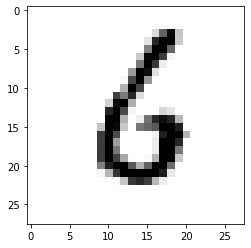

In [60]:
x_test_old = X_test.reshape(10000, 28,28)
plt.imshow(x_test_old[50], cmap=plt.cm.binary)

In [61]:
import numpy as np
predictions=model.predict(X_test)
np.argmax(predictions[50])

313/313 [==============================] - 0s 1ms/step


6

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---